Exploring the observability of gj_207.1, a wd+dm binary from https://arxiv.org/pdf/2105.14770.pdf

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d
from matplotlib.gridspec import GridSpec



#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [6]:
path = '/media/david/1tb_storage1/emergency_data/carmenes_binary/'

In [3]:
os.listdir(path)

['da08000_800.dk.dat.txt',
 'da36000_800.dk.dat.txt',
 'downloadScript_a32d7d73-ab0c-46a0-a717-34865a6dfd77.sh',
 'gj176',
 'models_1628548460',
 'models_1628872352',
 'models_1628872352.tgz',
 'readme_a32d7d73-ab0c-46a0-a717-34865a6dfd77.txt',
 'swift',
 'test.tgz',
 'xshooter']

In [4]:
mw, mf = np.loadtxt('{}/models_1628544736/koester2/da08000_800.dk.dat.txt'.format(path), unpack=True)

OSError: /media/david/1tb_storage1/emergency_data/carmenes_binary//models_1628544736/koester2/da08000_800.dk.dat.txt not found.

In [ ]:
data = fits.getdata('{}/gj176/hlsp_muscles_multi_multi_gj176_broadband_v22_adapt-const-res-sed.fits'.format(path))

In [ ]:
gw, gf = data['WAVELENGTH'], data['FLUX']

In [ ]:
d_gj176 = 1/(105.42748417135273e-3)*u.pc
d_gj207 = 1/(63.35970667464679e-3)*u.pc
rwd = 0.0128*u.Rsun

gj_scale = (d_gj176/d_gj207)**2
wd_scale =rwd.to(u.m)/d_gj207.to(u.m))**2 #
print(gj_scale, wd_scale)

In [ ]:
# plt.plot(gw, gf)
plt.plot(gw, gf*gj_scale)
plt.plot(mw, mf*wd_scale)
plt.xlim(1000, 3500)
plt.yscale('log')

In [ ]:
xsfiles = glob.glob('{}xshooter/*'.format(path))
# fits.getheader(xsfiles[0])
bfiles = []
for x in xsfiles:
    if fits.getheader(x)['DISPELEM'] == 'UVB':
        bfiles.append(x)
bfiles

In [ ]:
# for x in bfiles:
#     data = fits.getdata(x, 1)[0]
#     plt.plot(data['WAVE'], data['FLUX'])
    
    
d1 = fits.getdata(bfiles[1], 0)[0]
xw, xf, dq = d1['WAVE'], d1['FLUX'], d1['QUAL']
mask = (dq ==0) & (xw > 310)
xw, xf = xw[mask]*10, xf[mask]
# xw, xf = xw[dq==0], xf[dq==0]
plt.plot(xw, xf)

In [ ]:
# plt.plot(gw, gf)
plt.plot(gw, gf*gj_scale)
plt.plot(mw, mf*wd_scale)
plt.plot(xw, xf)
plt.xlim(1000, 6000)
plt.yscale('log')

checking the scaling on the svo files...


In [ ]:
# w1, f1 = np.loadtxt('{}/models_1622585191/koester2/da25000_750.dk.dat.txt'.format(path), unpack=True)
# w2, f2 = np.loadtxt('../pceb/cc_cet/CC-Cet.dk', unpack=True, skiprows=50)

# plt.plot(w1, f1)
# plt.plot(w2, f2*1e-8*np.pi)

# plt.yscale('log')
# plt.xscale('log')

Make a model pceb and put it into etc?

In [ ]:
mw1, mf1 = mw[(mw > 1000) & (mw < 7000)], mf[(mw > 1000) & (mw < 7000)]*wd_scale
gw1, gf1 = gw[(gw > 1000) & (gw < 7000)], gf[(gw > 1000) & (gw < 7000)]*gj_scale
plt.plot(gw1, gf1)
plt.plot(mw1, mf1)
pw = np.arange(1000, 7001, 1)
pf = interp1d(mw1, mf1, fill_value = 'extrapolate')(pw) +  interp1d(gw1, gf1, fill_value = 'extrapolate')(pw)

plt.plot(pw, pf)

WD flux still seems too high-  have emailed SVO - maybe it's not 4pi? Test with ETC... no-go for FUV, could be a 1-orbit quick job for NUV - Swift TOO?

In [ ]:
savdat = Table([pw, pf], names=['#WAVELENGTH', 'FLUX'])
ascii.write(savdat, 'gj207_1_wdmodel.dat', format='basic')

In [ ]:
filters = glob.glob('/home/david/work/filters/uvot/*.dat')
filters

In [ ]:
# for band in [filters[0], filters[2], filters[3]]:
#     print(band)
#     bw, bf = np.loadtxt(band, unpack=True)
#     fno = interp1d(gw1, gf1, fill_value = 'extrapolate')(bw)
#     fyes = interp1d(pw, pf, fill_value = 'extrapolate')(bw)
#     bno = np.trapz((fno*bf), bw)/np.trapz(bf, bw)    
#     byes = np.trapz((fyes*bf), bw)/np.trapz(bf, bw)
#     print('without wd', bno)    
#     print('with wd', byes)
#     print('ratio', byes/bno)
#     plt.plot(bw, fno)
#     plt.plot(bw, fyes)
#     plt.show()

Should be good for a ~500s exposure in uvw2.

In [ ]:
#galex nuv
wnuv = 2310*u.AA
fnuv = 214.e-6*u.Jy
fnuv = fnuv.to(u.erg/u.s/u.cm**2/u.AA, equivalencies=u.spectral_density(wnuv))
print(fnuv)

In [ ]:
bpw, bpf = np.loadtxt('../filters/galex/GALEX_GALEX.NUV.dat', unpack=True)
plt.plot(bpw, bpf)

In [ ]:
# plt.figure(figsize=(10, 6))
# plt.plot(gw1[(gw1 < 3240) | (gw1 > 3250)] , gf1[(gw1 < 3240) | (gw1 > 3250)], label = 'No White Dwarf')
# # plt.plot(mw1, mf1)
# plt.plot(pw, pf, label='With 8000\,K White Dwarf')
# plt.errorbar(wnuv.value, fnuv.value, yerr=0.1*fnuv.value, marker='o', ls='none', label='GALEX NUV')
# plt.yscale('log')
# plt.xlabel('Wavelength (\AA)')
# plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
# plt.legend(loc=4, frameon=True)
# plt.xlim(1501, 3999)
# plt.ylim(1.1e-17, 5e-14)
# # plt.plot(bpw, bpf*1e-13, ls = '--')
# plt.fill_betweenx([1e-19, 1e-12], bpw[0], bpw[-1], alpha =0.1, zorder=-100, color='k')
# # plt.plot(xw, xf)
# plt.tight_layout()
# plt.savefig('plots/gj207_1_model.png', dpi=150)
# plt.savefig('plots/gj207_1_model.pdf', dpi=150)

In [ ]:
def make_phot(bp_w, bp_cc, w, f):
    mask = (w >= bp_w[0]) & (w <= bp_w[-1])
    w, f = w[mask], f[mask]
    bb_cci = interp1d(bp_w, bp_cc, fill_value='extrapolate')(w)
    return np.trapz(f*bb_cci, w)/np.trapz(bb_cci, w)
    
fig = plt.figure(figsize=(14, 6))
gs = GridSpec(1,6, figure=fig)
plt.subplot(gs[0:4])
plt.plot(gw1, gf1, label = 'No WD')
# plt.plot(mw1, mf1)
plt.plot(pw, pf, label='With 8000\,K WD')
plt.errorbar(wnuv.value, fnuv.value, yerr=0.1*fnuv.value, marker='o', ls='none', label='GALEX')
plt.yscale('log')
plt.xlabel('Wavelength (\AA)')
plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
plt.legend(loc=4)
plt.xlim(1230, 3999)
plt.ylim(1.1e-19)
plt.subplot(gs[4:])

nwd_phot = make_phot(bpw, bpf,gw1, gf1)
wd_phot = make_phot(bpw, bpf,pw, pf)
plt.scatter((1, 2), [nwd_phot/fnuv.value, wd_phot/fnuv.value], c=('C0', 'C1'))
plt.xlim(0, 3)
plt.ylim(0.01, 1.2)
# plt.axhline(fnuv.value, ls='--')

plt.tight_layout()
# plt.savefig('plots/gj207_1_model.png', dpi=150)
# plt.savefig('plots/gj207_1_model.pdf', dpi=150)

Adding galex data from BS UMa

In [ ]:
# fnuv_bsuma = 84.8e-6*u.Jy
# fnuv_bsuma = fnuv_bsuma.to(u.erg/u.s/u.cm**2/u.AA, equivalencies=u.spectral_density(wnuv))
# d_bsuma = (1/7.623047936898915e-3)*u.pc

# bsscale = (d_bsuma/d_gj207)**2

# print(fnuv_bsuma)
# print(fnuv_bsuma*bsscale)

In [ ]:
# plt.figure(figsize=(10, 6))
# plt.plot(gw1[(gw1 < 3240) | (gw1 > 3250)] , gf1[(gw1 < 3240) | (gw1 > 3250)], label = 'No White Dwarf')
# # plt.plot(mw1, mf1)
# plt.plot(pw, pf, label='With 8000\,K White Dwarf')
# plt.errorbar(wnuv.value, fnuv.value, yerr=0.1*fnuv.value, marker='o', ls='none', label='GALEX NUV')
# plt.errorbar(wnuv.value, (fnuv_bsuma*bsscale).value/2, yerr=0.2*(fnuv_bsuma*bsscale).value/2, marker='o', ls='none', label='scaled BS UMa NUV/2')
# plt.yscale('log')
# plt.xlabel('Wavelength (\AA)')
# plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
# plt.legend(loc=4, frameon=True)
# plt.xlim(1501, 3999)
# plt.ylim(1.1e-17, 5e-14)
# # plt.plot(bpw, bpf*1e-13, ls = '--')
# plt.fill_betweenx([1e-19, 1e-12], bpw[0], bpw[-1], alpha =0.1, zorder=-100, color='k')
# # plt.plot(xw, xf)
# plt.tight_layout()
# plt.savefig('plots/gj207_1_bsuma.png', dpi=150)
# plt.savefig('plots/gj207_1_bsuma.pdf', dpi=150)

In [ ]:
#swift filters
swiftpath = '/home/david/work/filters/uvot/'

band_paths = glob.glob('{}Swift_UVOT.*.dat'.format(swiftpath))
print(band_paths)
band_paths.sort()

for band in band_paths:
    bws, bps = np.loadtxt(band, unpack=True)
    label = os.path.split(band)[1][11:-4]
    plt.plot(bws, bps, label=label)
plt.legend()

uvw2path = '/home/david/work/filters/uvot/Swift_UVOT.UVW2.dat'
bws, bps = np.loadtxt(uvw2path, unpack=True)

upath = '/home/david/work/filters/uvot/Swift_UVOT.U.dat'
ubw, ubp = np.loadtxt(upath, unpack=True)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(gw1[(gw1 < 3240) | (gw1 > 3250)] , gf1[(gw1 < 3240) | (gw1 > 3250)], label = 'No White Dwarf')
# plt.plot(mw1, mf1)
plt.plot(pw, pf, label='With 8000\,K White Dwarf')
plt.errorbar(wnuv.value, fnuv.value, yerr=0.1*fnuv.value, marker='o', ls='none', label='GALEX NUV')
plt.yscale('log')
plt.xlabel('Wavelength (\AA)')
plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
plt.legend(loc=4, frameon=True)
plt.xlim(1501, 3999)
plt.ylim(1.1e-17, 5e-14)
plt.plot(bws, bps*1e-16)
# plt.plot(bpw, bpf*1e-13, ls = '--')
plt.fill_betweenx([1e-19, 1e-12], bpw[0], bpw[-1], alpha =0.1, zorder=-100, color='k')
# plt.plot(xw, xf)
plt.tight_layout()
# plt.savefig('plots/gj207_1_bsuma.png', dpi=150)
# plt.savefig('plots/gj207_1_bsuma.pdf', dpi=150)

Yay we got Swift time!

In [ ]:
#10s
spath = '{}swift/working/gj207-1_uvw2_10slc.fits'.format(path)
data = fits.getdata(spath, 1)
t, f, e = data['TIME'], data['AB_FLUX_AA'], data['AB_FLUX_AA_ERR']
plt.errorbar(t, f, yerr=e, marker='o', ls='none')
plt.xlim(t[0]-100, t[0]+1000)
plt.show()
plt.errorbar(t, f, yerr=e, marker='o', ls='none')
plt.xlim(t[-1]-500, t[-1]+100)
plt.show()

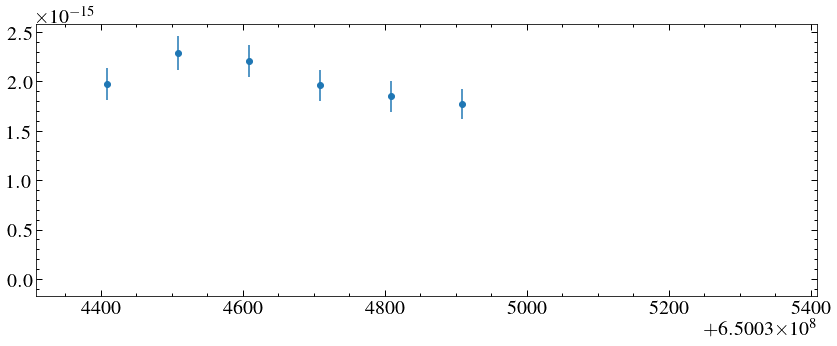

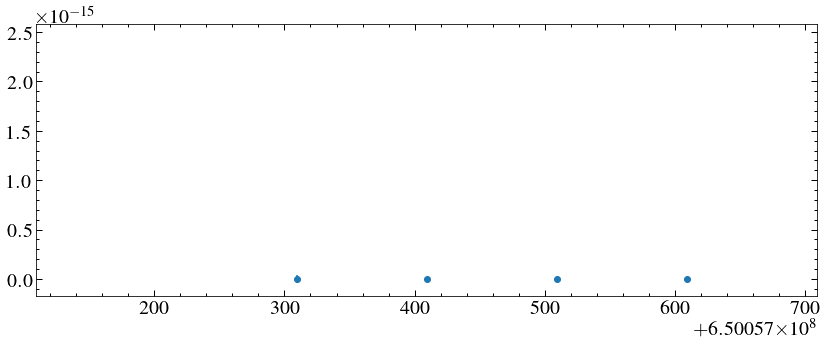

In [13]:
#100s
spath = '{}swift/working/gj207-1_uvw2_100slc.fits'.format(path)
data = fits.getdata(spath, 1)
t, f, e = data['TIME'], data['AB_FLUX_AA'], data['AB_FLUX_AA_ERR']
plt.errorbar(t, f, yerr=e, marker='o', ls='none')

plt.xlim(t[0]-100, t[0]+1000)
plt.show()
plt.errorbar(t, f, yerr=e, marker='o', ls='none')
plt.xlim(t[-1]-500, t[-1]+100)
plt.show()
# data.dtype.names

Ok so 2nd orbit is junk, sum up the first orbit...

In [ ]:
plt.errorbar(t[:6], f[:6], yerr=e[:6], marker='o', ls='none')
t1, f1, e1 = t[:6], f[:6], e[:6]
swift_flux = np.average(f1, weights = 1/(e1**2))
swift_error =  (1 / np.sum(1/(e1**2)))**0.5
print(swift_flux, swift_error)
swift_wave = 2054.61 #lambda_ref
print(swift_flux/swift_error)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(gw1[(gw1 < 3240) | (gw1 > 3250)] , gf1[(gw1 < 3240) | (gw1 > 3250)], label = 'No White Dwarf')
# plt.plot(mw1, mf1)
plt.plot(pw, pf, label='With 8000\,K White Dwarf')
plt.errorbar(wnuv.value, fnuv.value, yerr=0.1*fnuv.value, marker='o', ls='none', label='GALEX NUV')
plt.errorbar(swift_wave, swift_flux, yerr=swift_error, marker='o', ls='none', label = 'Swift UVW2')
plt.yscale('log')
plt.xlabel('Wavelength (\AA)')
plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
plt.legend(loc=4, frameon=True)
plt.xlim(1501, 3999)
plt.ylim(1.1e-17, 5e-14)
# plt.plot(bws, bps*1e-16)
# plt.plot(bpw, bpf*1e-13, ls = '--')
# plt.fill_betweenx([1e-19, 1e-12], bpw[0], bpw[-1], alpha =0.1, zorder=-100, color='k')
# plt.plot(xw, xf)
plt.tight_layout()
# plt.savefig('plots/gj207_1_bsuma.png', dpi=150)
# plt.savefig('plots/gj207_1_bsuma.pdf', dpi=150)

Huh. Did it flare? Can't tell. Check integration over bandpass, then compare x-ray spectrum

In [ ]:
# plt.figure(figsize=(8, 5))
# plt.plot(gw1[(gw1 < 3240) | (gw1 > 3250)] , gf1[(gw1 < 3240) | (gw1 > 3250)], label = 'Prediction 1')
# # plt.plot(mw1, mf1)
# plt.plot(pw, pf, label='Prediction 2')
# # plt.errorbar(wnuv.value, fnuv.value, yerr=0.1*fnuv.value, marker='o', ls='none', label='GALEX NUV')
# plt.errorbar(swift_wave, swift_flux, yerr=swift_error, marker='o', ls='none', label = 'New Swift Data')
# plt.yscale('log')
# plt.xlabel('Wavelength (\AA)')
# plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
# plt.legend(loc=1, frameon=True)
# plt.xlim(1901, 2399)
# plt.ylim(1.1e-17, 9e-15)
# # plt.plot(bws, bps*1e-16)
# # plt.plot(bpw, bpf*1e-13, ls = '--')
# # plt.fill_betweenx([1e-19, 1e-12], bpw[0], bpw[-1], alpha =0.1, zorder=-100, color='k')
# # plt.plot(xw, xf)
# plt.tight_layout()
# plt.savefig('plots/gj207_1_bsuma.png', dpi=150)
# plt.savefig('plots/gj207_1_bsuma.pdf', dpi=150)

In [ ]:
# plt.errorbar(t[6:], f[6:], yerr=e[6:], marker='o', ls='none')
# t2, f2, e2 = t[:6], f[:6], e[:6]
# swift_flux2 = np.average(f2, weights = 1/(e2**2))
# swift_error2 =  (1 / np.sum(1/(e2**2)))**0.5
# print(swift_flux2, swift_error2)
# swift_wave = 2054.61 #lambda_ref
#2nd obs is nonsense

In [ ]:
uvw2_nowd = make_phot(bpw, bpf, gw1, gf1)
uvw2_wd = make_phot(bpw, bpf, pw, pf)
print(uvw2_nowd, uvw2_wd)

In [ ]:
#xray
gwx, gfx = gw[(gw < 100)], gf[ (gw < 100)]*gj_scale
plt.step(gwx, gfx, where='mid')
xwv = [1.24, 41.3] #10-0.3 keV
x_mid = np.mean(xwv)
x_bin = (xwv[-1]-xwv[0])/2
xfo = 3.05773609569008e-12/(x_bin*2) #observed
xfo_e = [2.415720139670061e-12/(x_bin*2), 4.111130662350368e-12/(x_bin*2)]
xfu = 1.5903766838224638e-11/(x_bin*2) #unabsorbed, think this is the one I'm after
xfu_e = [5.288823818187477e-12/(x_bin*2), 1.2486163888153144e-10/(x_bin*2)]

plt.errorbar(x_mid, xfo, xerr= x_bin, yerr=([xfo_e[0]], [xfo_e[1]]))
plt.errorbar(x_mid, xfu, xerr= x_bin, yerr=([xfu_e[0]], [xfu_e[1]]))
plt.yscale('log')

#ok let's put a pin in that for now...

In [ ]:
plt.figure(figsize=(10, 8))
gs = GridSpec(4, 1)

ylims = (1.1e-17, 5e-14)
xlims = (1501, 3999)
plt.subplot(gs[:3])
plt.plot(gw1[(gw1 < 3240) | (gw1 > 3250)] , gf1[(gw1 < 3240) | (gw1 > 3250)], label = 'No White Dwarf')
# plt.plot(mw1, mf1)
plt.plot(pw, pf, label='With 8000\,K White Dwarf')
plt.errorbar(wnuv.value, fnuv.value, yerr=0.1*fnuv.value, marker='o', ls='none', label='GALEX NUV')
plt.errorbar(swift_wave, swift_flux, yerr=swift_error, marker='o', ls='none', label = 'Swift UVW2')

plt.plot(xw, convolve(xf, Box1DKernel(20)), ls='--')
uphot = make_phot(ubw, ubp, xw, xf)
uwave = 3467.05
plt.errorbar(uwave, uphot, yerr=0.1*uphot, marker='o', ls='none')
print(uphot)

plt.yscale('log')

plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
plt.legend(loc=4, frameon=True)
plt.xlim(xlims[0], xlims[1])
plt.ylim(ylims[0], ylims[1])
plt.xticks(visible=False)


plt.subplot(gs[3:])
# uvw2_nowd, uvw2_wd
plt.errorbar(swift_wave, uvw2_nowd/swift_flux, yerr= (uvw2_nowd*swift_error/swift_flux**2), marker='o', c='C0')
plt.errorbar(swift_wave, uvw2_wd/swift_flux, yerr= (uvw2_wd*swift_error/swift_flux**2), marker='o', c='C1')
# nwd_phot = make_phot(bpw, bpf,gw1, gf1)
# wd_phot = make_phot(bpw, bpf,pw, pf)
plt.errorbar(wnuv.value, nwd_phot/fnuv.value, yerr= (nwd_phot*0.1*fnuv.value/fnuv.value**2), marker='o', c='C0')
plt.errorbar(wnuv.value, wd_phot/fnuv.value, yerr= (wd_phot*0.1*fnuv.value/fnuv.value**2), marker='o', c='C1')

plt.ylim(0.01, 1.1)
plt.xlim(xlims[0], xlims[1])
plt.xlabel('Wavelength (\AA)')
plt.ylabel('$F_{\mathrm{model}}/F_{\mathrm{observed}}$')
plt.axhline(1, ls='--', c='0.5')
plt.tight_layout()
plt.subplots_adjust(hspace=0.05)
# plt.savefig('plots/gj207_1_bsuma.png', dpi=150)
# plt.savefig('plots/gj207_1_bsuma.pdf', dpi=150)

In [ ]:
import gPhoton

In [ ]:
skypos = [83.436, 1.945]


In [ ]:
nuv_exps = gPhoton.gFind(band='NUV', skypos=skypos)

In [ ]:
target = 'gj207-1'
step_size = 10.
phot_rad = 0.0045
ap_in = 0.0050
ap_out = 0.0060

In [ ]:
# nuv_photon_events = gPhoton.gAperture(band='NUV', skypos=skypos, stepsz=step_size, radius=phot_rad, annulus=[ap_in, ap_out], verbose=3, csvfile='galex/{}_nuv_{}s_lc.csv'.format(target, step_size), overwrite=True)

In [ ]:
nuv= Table.read('galex/{}_nuv_{}s_lc.csv'.format(target, step_size))

t, f, e, q = nuv['t_mean'], nuv['flux_bgsub'], nuv['flux_bgsub_err'], nuv['flags']
# t, f, e = t[q==0], f[q==0], e[q==0]
#plt.errorbar(t-t[0], f, yerr=e, ls='none', marker='o')
t0s, t1s = nuv_exps['NUV']['t0'], nuv_exps['NUV']['t1']
for t0, t1 in zip(t0s, t1s):
    mask = (t >=t0) & (t <=t1)
    print(np.median(f[mask]))
    plt.errorbar(t[mask], f[mask], yerr=e[mask], ls='none', marker='o')
#     plt.xlim(t0-20, t0+1397.)
    plt.show()
   # if (t1 - t0) > 900:
#     lc = lk.LightCurve(time=t[mask]*u.s, flux=f[mask], flux_err=e[mask])
#     pg = lc.to_periodogram(oversample_factor= 10, minimum_period=20*u.s, maximum_period=200*u.s)
#     plt.plot(pg.period.to(u.s), pg.power)
#     print(pg.period_at_max_power.to(u.s))
    plt.show()
    

In [ ]:
galex_flux = np.average(f1, weights = 1/(e1**2))
galex_error =  (1 / np.sum(1/(e1**2)))**0.5